# Clase 3:	Trabajando con opciones 

[Juan Diego Sánchez Torres](https://www.researchgate.net/profile/Juan_Diego_Sanchez_Torres), 

*Profesor*, [MAF ITESO](http://maf.iteso.mx/web/general/detalle?group_id=5858156)

+ Departamento de Matemáticas y Física
+ dsanchez@iteso.mx
+ Tel. 3669-34-34 Ext. 3069
+ Oficina: Cubículo 4, Edificio J, 2do piso

# 1. Uso de Pandas para descargar datos financieros

En primer lugar, para poder bajar precios y información sobre opciones de Yahoo, es necesario cargar algunos paquetes de Python. En este caso, el paquete principal será Pandas. También, se usarán el Scipy y el Numpy para las matemáticas necesarias y, el Matplotlib y el Seaborn para hacer gráficos de las series de datos.

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
from datetime import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#algunas opciones para Python
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

Una vez cargados los paquetes, es necesario definir los tickers de las acciones que se usarán, la fuente de descarga (Yahoo en este caso, pero también se puede desde Google) y las fechas de interés. Con esto, la función *DataReader* del paquete *pandas_datareader* bajará los precios solicitados.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte. El siguiente comando instala el paquete en Anaconda:
*conda install -c conda-forge pandas-datareader *

In [2]:
#Descargar datos de Yahoo! finance
#Tickers 
tickers = ['AA','AAPL','MSFT', '^GSPC']
# Fuente
data_source = 'yahoo'
# Fechas: desde 01/01/2014 hasta 12/31/2016.
start_date = '2014-01-01'
end_date = '2016-12-31'
# Usar el pandas data reader. El comando sort_index ordena los datos por fechas
assets = (web.DataReader(tickers, data_source, start_date, end_date)).sort_index('major_axis')
assets

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 756 (major_axis) x 4 (minor_axis)
Items axis: Adj Close to Volume
Major_axis axis: 2014-01-02 00:00:00 to 2016-12-30 00:00:00
Minor_axis axis: AA to ^GSPC

**Nota**: Para descargar datos de la bolsa mexicana de valores (BMV), el ticker debe tener la extensión MX. 
Por ejemplo: *MEXCHEM.MX*, *LABB.MX*, *GFINBURO.MX* y *GFNORTEO.MX*.

In [3]:
aapl = web.Options('AAPL', 'yahoo')
appl_opt = aapl.get_all_data().reset_index()
appl_opt

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
0,2.5,2017-11-17,call,...,2017-08-21 20:00:00,2017-08-09 18:58:30,"{'contractSize': 'REGULAR', 'openInterest': 0,..."
1,2.5,2018-01-19,call,...,2017-08-21 20:00:00,2017-08-09 19:07:11,"{'contractSize': 'REGULAR', 'openInterest': 0,..."
2,2.5,2018-01-19,put,...,2017-08-21 20:00:00,2017-08-11 21:11:33,"{'contractSize': 'REGULAR', 'openInterest': 2,..."
3,5.0,2017-09-15,call,...,2017-08-21 20:00:00,2017-08-11 21:25:02,"{'contractSize': 'REGULAR', 'openInterest': 0,..."
4,5.0,2018-01-19,call,...,2017-08-21 20:00:00,2017-08-11 17:03:55,"{'contractSize': 'REGULAR', 'openInterest': 0,..."
...,...,...,...,...,...,...,...
1121,300.0,2018-01-19,call,...,2017-08-21 20:00:00,2017-08-07 17:26:06,"{'contractSize': 'REGULAR', 'openInterest': 15..."
1122,300.0,2018-01-19,put,...,2017-08-21 20:00:00,2017-08-07 18:43:36,"{'contractSize': 'REGULAR', 'openInterest': 14..."
1123,305.0,2017-09-15,put,...,2017-08-21 20:00:00,2017-08-10 17:40:18,"{'contractSize': 'REGULAR', 'openInterest': 0,..."
1124,305.0,2018-01-19,call,...,2017-08-21 20:00:00,2017-07-29 03:46:20,"{'contractSize': 'REGULAR', 'openInterest': 1,..."


In [4]:
appl_opt['Expiry']

0      2017-11-17
1      2018-01-19
2      2018-01-19
3      2017-09-15
4      2018-01-19
          ...    
1121   2018-01-19
1122   2018-01-19
1123   2017-09-15
1124   2018-01-19
1125   2018-01-19
Name: Expiry, Length: 1126, dtype: datetime64[ns]

In [5]:
appl_opt['Type']

0       call
1       call
2        put
3       call
4       call
        ... 
1121    call
1122     put
1123     put
1124    call
1125     put
Name: Type, Length: 1126, dtype: object

In [6]:
appl_opt.loc[1080]

Strike                                                            250
Expiry                                            2018-02-16 00:00:00
Type                                                             call
Symbol                                            AAPL180216C00250000
Last                                                             0.14
                                          ...                        
Underlying                                                       AAPL
Underlying_Price                                                  157
Quote_Time                                        2017-08-21 20:00:00
Last_Trade_Date                                   2017-08-18 15:38:17
JSON                {'contractSize': 'REGULAR', 'openInterest': 19...
Name: 1080, Length: 19, dtype: object

In [7]:
call01 = appl_opt[(appl_opt.Expiry=='2018-01-19') & (appl_opt.Type=='call')]
call01

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
1,2.5,2018-01-19,call,...,2017-08-21 20:00:00,2017-08-09 19:07:11,"{'contractSize': 'REGULAR', 'openInterest': 0,..."
4,5.0,2018-01-19,call,...,2017-08-21 20:00:00,2017-08-11 17:03:55,"{'contractSize': 'REGULAR', 'openInterest': 0,..."
9,10.0,2018-01-19,call,...,2017-08-21 20:00:00,2017-08-09 19:07:37,"{'contractSize': 'REGULAR', 'openInterest': 3,..."
18,40.0,2018-01-19,call,...,2017-08-21 20:00:00,2017-08-09 19:08:15,"{'contractSize': 'REGULAR', 'openInterest': 0,..."
19,42.5,2018-01-19,call,...,2017-08-21 20:00:00,2017-08-11 19:29:30,"{'contractSize': 'REGULAR', 'openInterest': 22..."
...,...,...,...,...,...,...,...
1111,285.0,2018-01-19,call,...,2017-08-21 20:00:00,2017-07-29 03:46:19,"{'contractSize': 'REGULAR', 'openInterest': 20..."
1114,290.0,2018-01-19,call,...,2017-08-21 20:00:00,2017-08-03 20:02:58,"{'contractSize': 'REGULAR', 'openInterest': 11..."
1118,295.0,2018-01-19,call,...,2017-08-21 20:00:00,2017-07-27 17:22:40,"{'contractSize': 'REGULAR', 'openInterest': 11..."
1121,300.0,2018-01-19,call,...,2017-08-21 20:00:00,2017-08-07 17:26:06,"{'contractSize': 'REGULAR', 'openInterest': 15..."


# 2. Volatilidad implícita

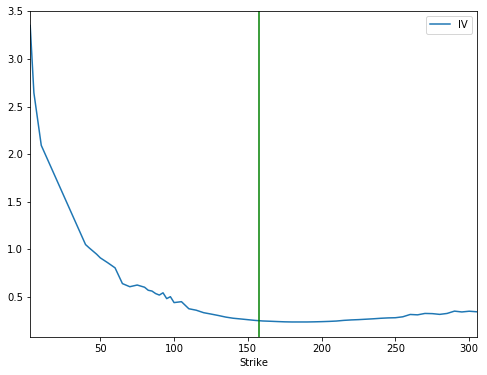

In [8]:
ax = call01.set_index('Strike')[['IV']].plot(figsize=(8,6))
ax.axvline(call01.Underlying_Price.iloc[0], color='g');

In [9]:
put01 = appl_opt[(appl_opt.Expiry=='2018-01-19') & (appl_opt.Type=='put')]
put01

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
2,2.5,2018-01-19,put,...,2017-08-21 20:00:00,2017-08-11 21:11:33,"{'contractSize': 'REGULAR', 'openInterest': 2,..."
5,5.0,2018-01-19,put,...,2017-08-21 20:00:00,2017-06-03 03:55:30,"{'contractSize': 'REGULAR', 'openInterest': 1,..."
13,30.0,2018-01-19,put,...,2017-08-21 20:00:00,2017-06-03 03:55:29,"{'contractSize': 'REGULAR', 'openInterest': 30..."
20,42.5,2018-01-19,put,...,2017-08-21 20:00:00,2017-06-03 03:55:29,"{'contractSize': 'REGULAR', 'openInterest': 47..."
28,47.5,2018-01-19,put,...,2017-08-21 20:00:00,2017-07-27 15:34:18,"{'contractSize': 'REGULAR', 'openInterest': 86..."
...,...,...,...,...,...,...,...
1094,260.0,2018-01-19,put,...,2017-08-21 20:00:00,2017-06-10 03:49:38,"{'contractSize': 'REGULAR', 'openInterest': 10..."
1108,280.0,2018-01-19,put,...,2017-08-21 20:00:00,2017-07-22 03:54:35,"{'contractSize': 'REGULAR', 'openInterest': 45..."
1115,290.0,2018-01-19,put,...,2017-08-21 20:00:00,2017-07-29 03:46:34,"{'contractSize': 'REGULAR', 'openInterest': 20..."
1122,300.0,2018-01-19,put,...,2017-08-21 20:00:00,2017-08-07 18:43:36,"{'contractSize': 'REGULAR', 'openInterest': 14..."


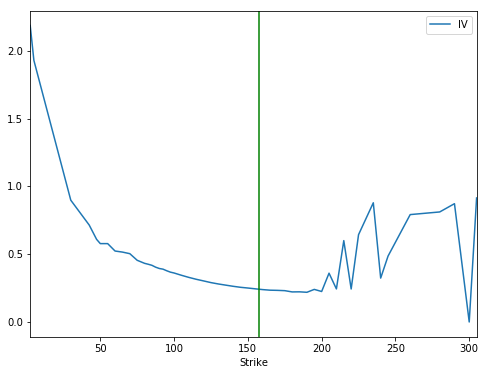

In [10]:
ax = put01.set_index('Strike')[['IV']].plot(figsize=(8,6))
ax.axvline(put01.Underlying_Price.iloc[0], color='g');

# 3. Gráficos del *Pay Off*

In [11]:
def call_payoff(ST, K):
    return max(0, ST-K)

In [12]:
call_payoff(25, 30)

0

In [13]:
def call_payoffs(STmin, STmax, K, step=1):
    maturities = np.arange(STmin, STmax+step, step)
    payoffs = np.vectorize(call_payoff)(maturities, K)
    df = pd.DataFrame({'Strike': K, 'Payoff': payoffs}, index=maturities)
    df.index.name = 'Precio de maduración'
    return df

In [14]:
call_payoffs(10,25,15)

,Payoff,Strike
Precio de maduración,,
10,0,15
11,0,15
12,0,15
13,0,15
14,0,15
...,...,...
21,6,15
22,7,15
23,8,15


In [15]:
def plot_call_payoffs(STmin, STmax, K, step=1):
    payoffs = call_payoffs(STmin, STmax, K, step)
    plt.ylim(payoffs.Payoff.min() - 10, payoffs.Payoff.max() + 10)
    plt.ylabel("Payoff")
    plt.xlabel("Precio de maduración")
    plt.title('Payoff call, Precio strike={0}'.format(K))
    plt.xlim(STmin, STmax)
    plt.plot(payoffs.index, payoffs.Payoff.values);

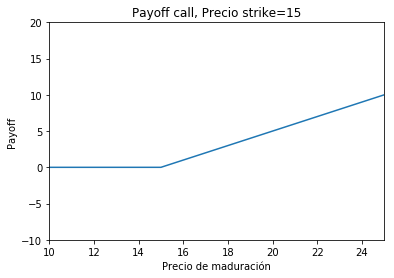

In [16]:
plot_call_payoffs(10, 25, 15)

In [17]:
def put_payoff(ST, K):
    return max(0, K-ST)

In [18]:
put_payoff(25, 30)

5

In [19]:
def put_payoffs(STmin, STmax, K, step=1):
    maturities = np.arange(STmin, STmax+step, step)
    payoffs = np.vectorize(put_payoff)(maturities, K)
    df = pd.DataFrame({'Strike': K, 'Payoff': payoffs}, index=maturities)
    df.index.name = 'Precio de maduración'
    return df

In [20]:
put_payoffs(10,25,15)

,Payoff,Strike
Precio de maduración,,
10,5,15
11,4,15
12,3,15
13,2,15
14,1,15
...,...,...
21,0,15
22,0,15
23,0,15


In [21]:
def plot_put_payoffs(STmin, STmax, K, step=1):
    payoffs = put_payoffs(STmin, STmax, K, step)
    plt.ylim(payoffs.Payoff.min() - 10, payoffs.Payoff.max() + 10)
    plt.ylabel("Payoff")
    plt.xlabel("Precio de maduración")
    plt.title('Payoff put, Precio strike={0}'.format(K))
    plt.xlim(STmin, STmax)
    plt.plot(payoffs.index, payoffs.Payoff.values);

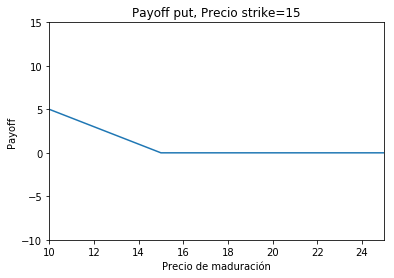

In [22]:
plot_put_payoffs(10, 25, 15)

In [23]:
def call_pnl_buyer(ct, K, STmin, STmax, step = 1):
    maturities = np.arange(STmin, STmax+step, step)
    payoffs = np.vectorize(call_payoff)(maturities, K)
    df = pd.DataFrame({'Strike': K, 'Payoff': payoffs, 'Prima': ct, 'PnL': payoffs-ct}, index=maturities)
    df.index.name = 'Precio de maduración'
    return df


In [24]:
call_pnl_buyer(12, 15, 10, 35)

,Payoff,PnL,Prima,Strike
Precio de maduración,,,,
10,0,-12,12,15
11,0,-12,12,15
12,0,-12,12,15
13,0,-12,12,15
14,0,-12,12,15
...,...,...,...,...
31,16,4,12,15
32,17,5,12,15
33,18,6,12,15


In [25]:
def call_pnl_seller(ct, K, STmin, STmax, step = 1):
    maturities = np.arange(STmin, STmax+step, step)
    payoffs = np.vectorize(call_payoff)(maturities, K)
    df = pd.DataFrame({'Strike': K, 'Payoff': payoffs, 'Prima': ct, 'PnL': ct-payoffs}, index=maturities)
    df.index.name = 'Precio de maduración'
    return df

In [26]:
call_pnl_seller(12, 15, 10, 35)

,Payoff,PnL,Prima,Strike
Precio de maduración,,,,
10,0,12,12,15
11,0,12,12,15
12,0,12,12,15
13,0,12,12,15
14,0,12,12,15
...,...,...,...,...
31,16,-4,12,15
32,17,-5,12,15
33,18,-6,12,15


In [27]:
def call_pnl_combined(ct, K, STmin, STmax, step = 1):
    maturities = np.arange(STmin, STmax+step, step)
    payoffs = np.vectorize(call_payoff)(maturities, K)
    df = pd.DataFrame({'Strike': K, 'Payoff': payoffs, 'Prima': ct, 'PnLcomprador': payoffs-ct, 'PnLvendedor': ct-payoffs}, index=maturities)
    df.index.name = 'Precio de maduración'
    return df

In [28]:
call_pnl_combined(12, 15, 10, 35)

,Payoff,PnLcomprador,PnLvendedor,Prima,Strike
Precio de maduración,,,,,
10,0,-12,12,12,15
11,0,-12,12,12,15
12,0,-12,12,12,15
13,0,-12,12,12,15
14,0,-12,12,12,15
...,...,...,...,...,...
31,16,4,-4,12,15
32,17,5,-5,12,15
33,18,6,-6,12,15


In [29]:
def put_pnl_buyer(ct, K, STmin, STmax, step = 1):
    maturities = np.arange(STmin, STmax+step, step)
    payoffs = np.vectorize(put_payoff)(maturities, K)
    df = pd.DataFrame({'Strike': K, 'Payoff': payoffs, 'Prima': ct, 'PnL': payoffs-ct}, index=maturities)
    df.index.name = 'Precio de maduración'
    return df

In [30]:
put_pnl_buyer(2, 15, 10, 30)

,Payoff,PnL,Prima,Strike
Precio de maduración,,,,
10,5,3,2,15
11,4,2,2,15
12,3,1,2,15
13,2,0,2,15
14,1,-1,2,15
...,...,...,...,...
26,0,-2,2,15
27,0,-2,2,15
28,0,-2,2,15


In [31]:
def put_pnl_seller(ct, K, STmin, STmax, step = 1):
    maturities = np.arange(STmin, STmax+step, step)
    payoffs = np.vectorize(put_payoff)(maturities, K)
    df = pd.DataFrame({'Strike': K, 'Payoff': payoffs, 'Prima': ct, 'PnL': ct-payoffs}, index=maturities)
    df.index.name = 'Precio de maduración'
    return df

In [32]:
put_pnl_seller(2, 15, 10, 30)

,Payoff,PnL,Prima,Strike
Precio de maduración,,,,
10,5,-3,2,15
11,4,-2,2,15
12,3,-1,2,15
13,2,0,2,15
14,1,1,2,15
...,...,...,...,...
26,0,2,2,15
27,0,2,2,15
28,0,2,2,15


In [33]:
def put_pnl_combined(ct, K, STmin, STmax, step = 1):
    maturities = np.arange(STmin, STmax+step, step)
    payoffs = np.vectorize(put_payoff)(maturities, K)
    df = pd.DataFrame({'Strike': K, 'Payoff': payoffs, 'Prima': ct, 'PnLcomprador': payoffs-ct, 'PnLvendedor': ct-payoffs}, index=maturities)
    df.index.name = 'Precio de maduración'
    return df

In [34]:
put_pnl_combined(2, 15, 10, 30)

,Payoff,PnLcomprador,PnLvendedor,Prima,Strike
Precio de maduración,,,,,
10,5,3,-3,2,15
11,4,2,-2,2,15
12,3,1,-1,2,15
13,2,0,0,2,15
14,1,-1,1,2,15
...,...,...,...,...,...
26,0,-2,2,2,15
27,0,-2,2,2,15
28,0,-2,2,2,15


In [35]:
def plot_pnl(pnl_df, okind, who):
    plt.ylim(pnl_df.Payoff.min() - 10, pnl_df.Payoff.max() + 10)
    plt.ylabel("Ganancia/pérdida")
    plt.xlabel("Precio de maduración")
    plt.title('Ganancia y pérdida de una opción {0} para el {1}, Prima={2}, Strike={3}'.format(okind, who, pnl_df.Prima.iloc[0],
    pnl_df.Strike.iloc[0]))
    plt.ylim(pnl_df.PnL.min()-3, pnl_df.PnL.max() + 3)
    plt.xlim(pnl_df.index[0], pnl_df.index[len(pnl_df.index)-1])
    plt.plot(pnl_df.index, pnl_df.PnL)
    plt.axhline(0, color='g');

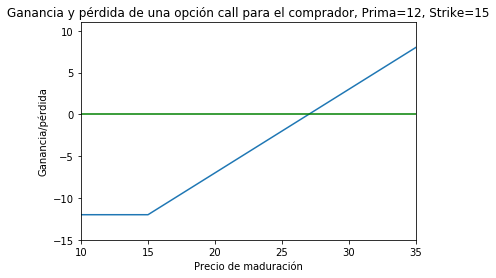

In [36]:
plot_pnl(call_pnl_buyer(12, 15, 10, 35), "call", "comprador")

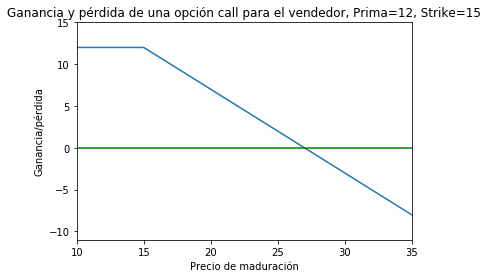

In [37]:
plot_pnl(call_pnl_seller(12, 15, 10, 35), "call", "vendedor")

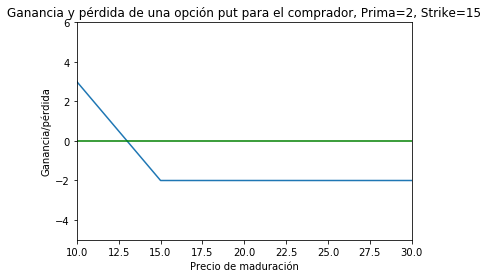

In [38]:
plot_pnl(put_pnl_buyer(2, 15, 10, 30), "put", "comprador")